
# Project 2: Wrangle And Analyze Data 

#### Project Steps Overview
Your tasks in this project are as follows:

* Step 1: Gathering data

* Step 2: Assessing data

* Step 3: Cleaning data

* Step 4: Storing data

* Step 5: Analyzing, and visualizing data

* Step 6: Reporting

* your data wrangling efforts
* your data analyses and visualizations

## Introduction
* Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

* The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

* WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

In [1]:
# These are the packages that will be used for this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
%matplotlib inline
import seaborn as sns
import requests
import json
import tweepy

# Gather

## Step 1: Gathering Data
In this section, gather all three pieces of data for this project and load them in the notebook. 

**Note: the methods required to gather each data are different.**

### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# We are going to create the first dataset that we want to wrangle
# from the twitter archive enhanced file that we downloaded manually.

twitter_archive = pd.read_csv('C:/Users/Lauren.Mukanda/Downloads/twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# To get our second dataset we need to programatically download it with the code below
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# We are going to create our second dataset that we want to wrangle
# from the image prediction file that we downloaded programmatically.
with open('C:/Users/Lauren.Mukanda/Downloads/image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

# Because the file is a tsv file we need to let our program know it's opening a tsv file and not a csv file.
# We do that with this code below
image_predictions = pd.read_csv('C:/Users/Lauren.Mukanda/Downloads/image-predictions.tsv', sep = '\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### To get our third dataset is a bit of a process and we will do it in steps*

#### First We are going to obtain our Tweepy keys and tokens and define them here*
consumer_key = 'YOUR CONSUMER KEY'

consumer_secret = 'YOUR CONSUMER SECRET'

access_token = 'YOUR ACCESS TOKEN'

access_secret = 'YOUR ACCESS SECRET'

##### Then you will create an API .OAuthHandler instance*
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

##### Asswell as an .API instance*
api = tweepy.API(auth, wait_on_rate_limit = True)
                 
#### Second we want to collect the tweets that we need so we will create a For loot that will allow us to add our tweets in a line, so we can create out tweet_json.txt file.*

##### First create a dicitonary to save your dataset in*
tweet_list = []

##### then creat a dictionary to keep track of your errors*
page_doesnt_exist = []

with open('C:/Users/Lauren.Mukanda/Downloads/tweet-json.txt', mode = 'w') as files:

    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode= 'extended')
            files.write(json.dump(tweet._json, files))
            
##### Append the whole thing to the dictionary you created
            
            tweet_list.append({'tweet_id': tweet._json['id_str'],
                      'retweet_count': tweet._json['retweet_count'],
                      'favourite_count': tweet._json['favourite_count'],
                      'followers_count': tweet._json['user']['followers_count']})
        except:
            page_doesnt_exist.append(tweet_id)

#### Lastly we create our dataframe from the list we just created

tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favourite_count', 'followers_count']) 

tweet_json.head(2)

### 3.1. Alternative to using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# First create a dicitonary to save your dataset in
tweet_list = []

# Secondly create a list to save each tweets in your .txt file as a new line.
with open("C:/Users/Lauren.Mukanda/Downloads/tweet-json.txt", "r")as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet ["id"]
        retweet_count = tweet ["retweet_count"]
        favorite_count = tweet ["favorite_count"] 
        followers_count = tweet ["user"]["followers_count"]
    
# Then append the line of lists you created to your dictionary 
        tweet_list.append({"tweet_id": tweet_id,
                            "retweet_count" : retweet_count,
                            "favorite_count" : favorite_count,
                            "followers_count" : followers_count})
    
# Lastly we create our dataframe from the list we just created
tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

# After creating a dataframe for our .txt file we now want to save it as .csv file
# so that in future if someone wants to use that instead of the original file they will have easier access to it.
tweet_json.to_csv('tweet_json.csv', encoding = 'utf-8', index=False)
tweet_json.head(2)  

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889


# Assess

## Step 2: Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both visual assessment and programmatic assessement** to assess the data.

**Note: pay attention to the following key points when you access the data.**

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Visual Assessment

#### twitter_archive_enhanced

In [5]:
# Open the first 10 lines in our dataframe to do a visual assessment
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### image_predictions

In [6]:
# Open the first 10 lines in our dataframe to do a visual assessment
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### tweet_json

In [7]:
# Open the first 10 lines in our dataframe to do a visual assessment
tweet_json.head(10)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


### Programmatic Assessment

#### twitter_archive_enhanced

In [8]:
# Get the info of the dataframe to see if there are any mistakes.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Check to see if there are any observations that has been duplicated.
sum(twitter_archive.duplicated())

0

#### image_predictions

In [10]:
# Get the info of the dataframe to see if there are any mistakes.
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# Check to see if there are any observations that has been duplicated.
sum(image_predictions.duplicated())

0

#### tweet_json

In [12]:
# Get the info of the dataframe to see if there are any mistakes.
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [13]:
# Get the useful descritive of the dataframe.
tweet_json.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


### Quality issues
##### twitter_archive_enhanced
* 1. There are missing data in more than one column, some observations are futile so they are not needed

* 2. Dog sizes are represented as "None"

* 3. There are invalid dog names in the column: name

* 4. Some observations have more than one dog sizes

* 5. Keep the original ratings (no retweets) that have images

* 6. Source column is in HTML format and not normal format

##### image_predictions
* 7. Missing images from a sample of 2356 there's only 2075 count 

##### All dataframes
* 8. Invalid datatype for tweet_id it should be a string and timestamp should be date and time value

### Tidiness issues
* 1. Column values are headers (doggo, floofer, pupper, and poppo) they should be in one column: dog size

* 2. The three dataframes are not merged into one.

# Clean

## Step 3: Cleaning Data
Clean all of the issues you documented while assessing. Perform this cleaning in the "Cleaning Data" section.

**Make sure you complete the following items in this step.**

* Before you perform the cleaning, you will make a copy of the original data.
* During cleaning, use the define-code-test framework and clearly document it.
* Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of your dataframes before proceeding to clean them, that way you preserve the original data.
clean_archive = twitter_archive.copy()
clean_predictions = image_predictions.copy()
clean_tweets = tweet_json.copy()

#### Define

Drop columns that have have multiple missing data and observations that are futile and not need for the analysis
Keep the original ratings (no retweets) that have images

#### Code

In [15]:
# Overall we won't be using this column but before dropping it we want to delete retweets
# so that we can keep the original ratings that have images.
clean_archive = clean_archive[pd.isnull(clean_archive['retweeted_status_user_id'])]

# Now to check and see if what we did took effect
print(clean_archive['retweeted_status_user_id'].value_counts().sum())

0


In [16]:
# In this dataframe we won't be using these columns since they are not needed for the analysis process so we can drop them
clean_archive = clean_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                  'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'],axis = 1)

#### Test

In [17]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


#### Define

Dog sizes are represented as "None", and Some observations have more than one dog stage
Column values are headers (doggo, floofer, pupper, and poppo) they should be in merged in one column called dog stages

#### Code

In [18]:
# We want to create a new column for the dog stages that we will merge into one and name it dog_size
clean_archive['dog_size'] = None
clean_archive['dog_size'] = clean_archive.doggo + clean_archive.floofer + clean_archive.pupper + clean_archive.puppo

In [19]:
# Now we are just going to replace the "none" value with " "
clean_archive['dog_size'] = clean_archive['dog_size'].map(lambda x: x.replace("None", ""))

# Just to get a visual of what it is that we are doing
clean_archive['dog_size'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_size, dtype: int64

In [20]:
# We saw that we have three dog_size that have more than one stage so we want to separate them
#  and the one with blank values we want fill it with 'none', so that it's to analyze them later.
clean_archive.loc[clean_archive['dog_size'] == '', 'dog_size'] = 'none'
clean_archive.loc[clean_archive['dog_size'] == 'doggopupper', 'dog_size'] = 'doggo, pupper'
clean_archive.loc[clean_archive['dog_size'] == 'doggopuppo', 'dog_size'] = 'doggo, pupper'
clean_archive.loc[clean_archive['dog_size'] == 'doggofloofer', 'dog_size'] = 'doggo, floofer'

# Because 'puppo' is just another term for 'pupper', we will just use 'pupper' as the main name
clean_archive.loc[clean_archive['dog_size'] == 'puppo', 'dog_size'] = 'pupper'

# Just to get a visual of what it is that we did
clean_archive['dog_size'].value_counts()

none              1831
pupper             248
doggo               75
doggo, pupper       11
floofer              9
doggo, floofer       1
Name: dog_size, dtype: int64

In [21]:
# Lastly we want to see if we created our new column
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
 11  dog_size            2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [22]:
# We saw that the doggo, floofer, pupper, and puppo columns still exist so we need to drop them
clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [23]:
# To make sure all the columns were dropped.
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   dog_size            2175 non-null   object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


#### Define

There are invalid dog names in the column: name.

#### Code

In [24]:
# This will show us the unique name characters
clean_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [25]:
# This will make the changes to the dog names
clean_archive['name'][clean_archive['name'].str.match('[a-z]')] = None

C:\Users\Lauren.Mukanda\AppData\Local\Temp\ipykernel_1704\1716163179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive['name'][clean_archive['name'].str.match('[a-z]')] = None


#### Test

In [26]:
# To make sure the changes we made are in effect
clean_archive['name'].value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

#### Define

Source column is in HTML format and not normal format

#### Code

In [27]:
# We want to remove the html format
clean_archive['source'] = clean_archive['source'].str.extract(pat = '>([\w\W\s]*)<', expand = True)

#### Test

In [28]:
# To make sure that the changes we made took effect
clean_archive['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define

The three dataframes are not merged into one.

#### Code

In [29]:
# We want to merge all the three dataframes into one master dataframe
master_archive_clean = clean_archive.merge(clean_predictions, on = 'tweet_id').merge(clean_tweets, on = 'tweet_id')

#### Test

In [30]:
master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   rating_numerator    1994 non-null   int64  
 5   rating_denominator  1994 non-null   int64  
 6   name                1896 non-null   object 
 7   dog_size            1994 non-null   object 
 8   jpg_url             1994 non-null   object 
 9   img_num             1994 non-null   int64  
 10  p1                  1994 non-null   object 
 11  p1_conf             1994 non-null   float64
 12  p1_dog              1994 non-null   bool   
 13  p2                  1994 non-null   object 
 14  p2_conf             1994 non-null   float64
 15  p2_dog              1994 non-null   bool   
 16  p3    

#### Define

Let us drop any observation without a picture 

#### Code

In [31]:
# We want to drop rows that don't have images
master_archive_clean.dropna(axis = 0, inplace = True)

#### Test

In [32]:
# This is to see if any changes took place
master_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1896 non-null   int64  
 1   timestamp           1896 non-null   object 
 2   source              1896 non-null   object 
 3   text                1896 non-null   object 
 4   rating_numerator    1896 non-null   int64  
 5   rating_denominator  1896 non-null   int64  
 6   name                1896 non-null   object 
 7   dog_size            1896 non-null   object 
 8   jpg_url             1896 non-null   object 
 9   img_num             1896 non-null   int64  
 10  p1                  1896 non-null   object 
 11  p1_conf             1896 non-null   float64
 12  p1_dog              1896 non-null   bool   
 13  p2                  1896 non-null   object 
 14  p2_conf             1896 non-null   float64
 15  p2_dog              1896 non-null   bool   
 16  p3    

#### Define

Invalid datatype for tweet_id it should be a string and timestamp should be date and time value

#### Code

In [33]:
# Change the datatype of the tweet_id, source and stages into a string
master_archive_clean['tweet_id'] = master_archive_clean['tweet_id'].astype(str)

# Change the data of the timestamp into a datetime value
master_archive_clean['timestamp'] = pd.to_datetime(master_archive_clean['timestamp'])

# Change the datatype of both source and dog_size into a categorical value
master_archive_clean['source'] = master_archive_clean['source'].astype('category')

master_archive_clean['dog_size'] = master_archive_clean['dog_size'].astype('category')

#### Test

In [34]:
# To confirm that the format type changed we will this code to confirm.
master_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_size                         category
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
followers_count                     int64
dtype: object

# Store

## Step 4: Storing Data
In the "Storing Data" section, store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv.

In [35]:
# We want to save our cleaned dataframe into a .csv file.
master_archive_clean.to_csv('C:/Users/Lauren.Mukanda/Downloads/twitter_archive_master.csv', index=False)

# Analyze and Visualize

## Step 5: Analyzing and Visualizing Data
In the Analyzing and Visualizing Data section, analyze and visualize your wrangled data.

* You must produce at least **three (3) insights and one (1) visualization.**
* You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.

In [36]:
# Now that we've cleaned our master data and saved it as a .csv file 
# now we want to open so that we can analyze and visualize it.
twitter_archive_master = pd.read_csv('C:/Users/Lauren.Mukanda/Downloads/twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1896 non-null   int64  
 1   timestamp           1896 non-null   object 
 2   source              1896 non-null   object 
 3   text                1896 non-null   object 
 4   rating_numerator    1896 non-null   int64  
 5   rating_denominator  1896 non-null   int64  
 6   name                1896 non-null   object 
 7   dog_size            1896 non-null   object 
 8   jpg_url             1896 non-null   object 
 9   img_num             1896 non-null   int64  
 10  p1                  1896 non-null   object 
 11  p1_conf             1896 non-null   float64
 12  p1_dog              1896 non-null   bool   
 13  p2                  1896 non-null   object 
 14  p2_conf             1896 non-null   float64
 15  p2_dog              1896 non-null   bool   
 16  p3    

In [37]:
# Since we saved it as a .csv file the datatype went back to the defualts so we need to change them again.

# Change the datatype of the tweet_id, source and stages into a string
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(str)

# Change the data of the timestamp into a datetime value
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

# Change the datatype of both source and dog_size into a categorical value
twitter_archive_master['source'] = twitter_archive_master['source'].astype('category')

twitter_archive_master['dog_size'] = twitter_archive_master['dog_size'].astype('category')

# To varify that the format type changed we will this code to confirm.
twitter_archive_master.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_size                         category
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
followers_count                     int64
dtype: object

In [38]:
# Because with some questions I want to draw a bar graph, I will create a function that will allow me to do that
# so that I can call that function anytime I want to draw a graph
def bargraph_plot(x, xlabel, ylabel, title):
    """
    This function will plot a bargraph based on the parameters passed on:
    x (string): the series you want to plot
    xlabel (category): the label on the x-axis
    ylabel (string): the label on the y-axis
    title(string): the title of the graph
    """
    mplt.xlabel(xlabel, fontsize=20)
    mplt.ylabel(ylabel, fontsize=20)
    mplt.title(title, fontsize=20)
    plot = x.plot(kind='bar', figsize=(10,8))
    sns.set_style("darkgrid")
    return plot

## Which dog size has the most favorite count?

In [39]:
# We want to look at which dog size has the most favorite count.
size_count = twitter_archive_master[['dog_size', 'favorite_count']]
size_count = size_count.query('dog_size ! = "none" ')
size_count = twitter_archive_master.groupby('dog_size').count()['favorite_count']


In [40]:
size_count.head()

dog_size
doggo               61
doggo, floofer       1
doggo, pupper        9
floofer              7
none              1602
Name: favorite_count, dtype: int64

<AxesSubplot:title={'center':'Dog Sizes with Highest Count'}, xlabel='dog_size', ylabel='Dog Count'>

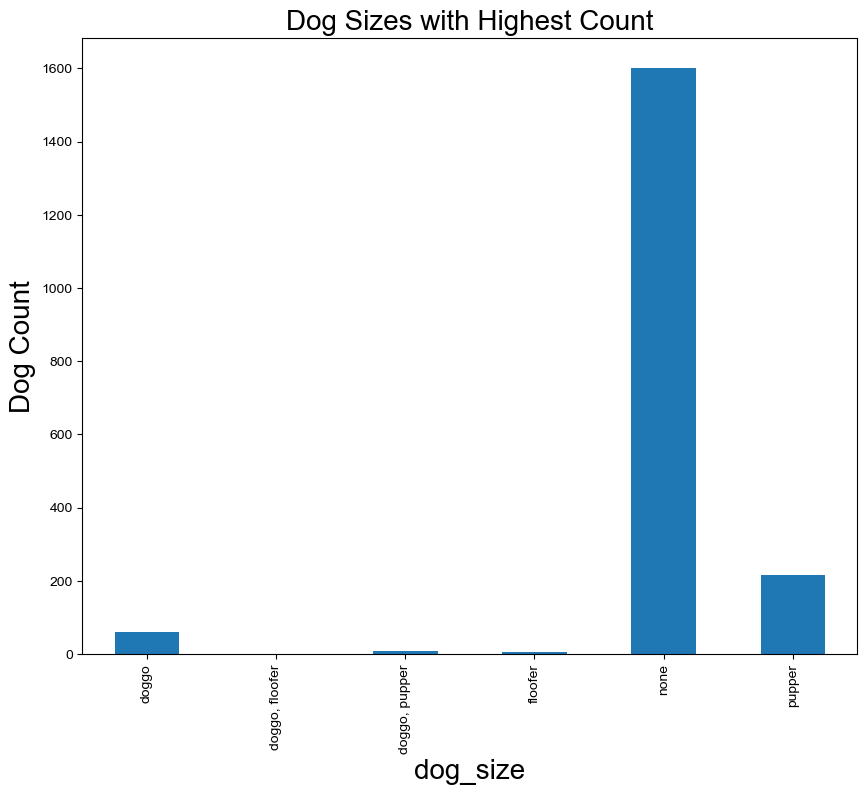

In [41]:
# This will give us a pie chart visual
bargraph_plot(size_count, 'Dog Size', 'Dog Count', 'Dog Sizes with Highest Count')

Because our dataset had so many observations without dog sizes we that those unknown dog informationg got the most favorite counts followed by pupper and then doggo.
So from the little we know we can at least say that the pupper category got the most favorite counts, pupper in "doggoLingo" stands for puppy so you can see why it got the most counts. I mean who doesnt love puppies?

## Which twitter source has the most retweet count?

<AxesSubplot:title={'center':'Source vs. Retweet Count'}>

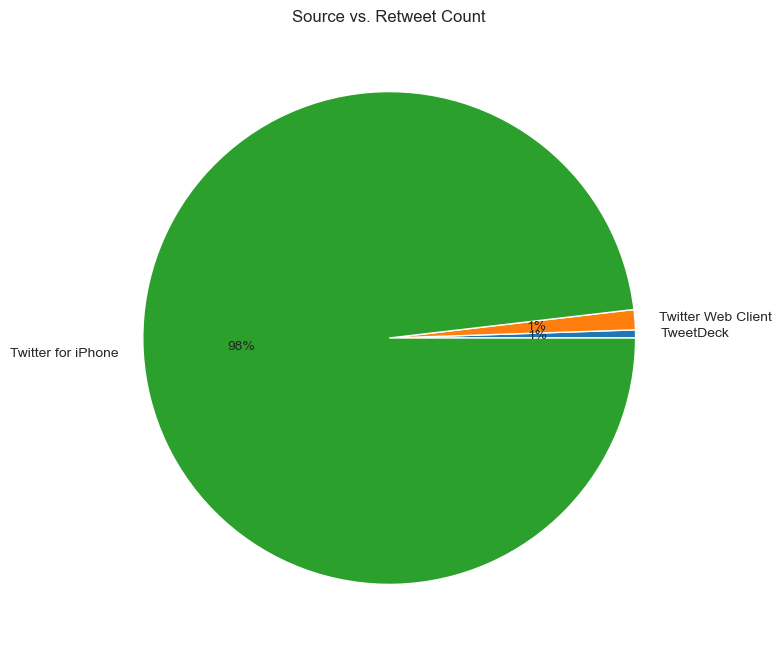

In [42]:
# We want to look at which twitter source has the most retweet.
# Let us first group the retweet count by the twitter source so that it makes getting the total easier.
source_retweet_count = twitter_archive_master.groupby('source').count()['retweet_count']

# This will give us a pie chart visual
source_retweet_count.plot(kind='pie', title='Source vs. Retweet Count', ylabel='', autopct='%1.0f%%', figsize=(10,8))

From the pie chart we can see that most of the twitter users tend to be using iPhones as 98% of the retweets came from users using that source. 

## What is the most common dog name?

<AxesSubplot:title={'center':'Most common Dog Names'}, xlabel='Dog Names', ylabel='Name Count'>

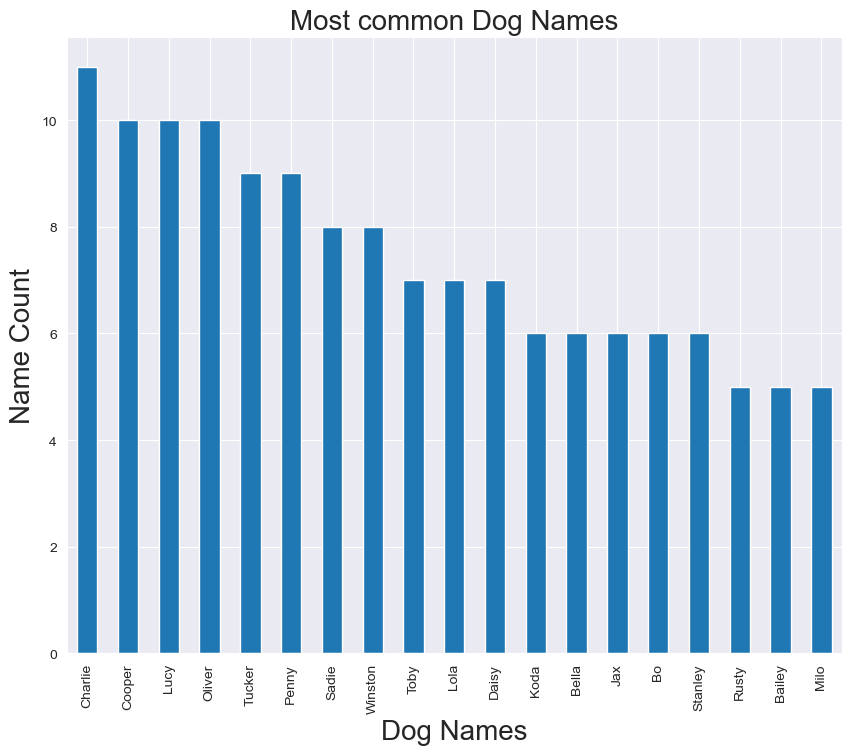

In [43]:
# To get the most common name we first need to generate the number of time that name appears in our dataframe.
# because there were a lot of names that only 1 entrie i opted to print out the first 20 to avoid a cluster.
name_count = twitter_archive_master['name'].value_counts()[1:20]

# This will then print out the this appearances
bargraph_plot(name_count, 'Dog Names', 'Name Count', 'Most common Dog Names')

From the graph above we can see that one of the most popular dog names is charlie folowed by Tucker and Lucy.

## What is the correlation between favorite count and retweet count?

The Correlation Between Favorite Count and Retweet Count Is:  0.9113095973345445


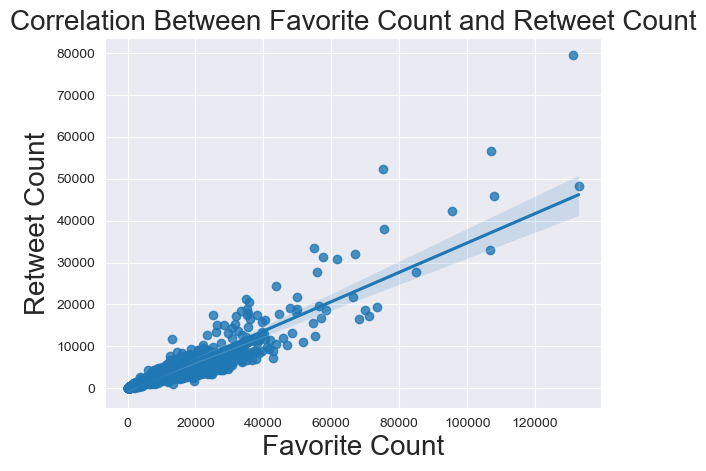

In [44]:
# We want to know what is the correlation between favorite count and the retweet count,
# to get that we will just run a few line of code to achieve that.

# This code will draw the regplot and show it.
retweet_favorite = sns.regplot(x = "favorite_count", y = "retweet_count", data = twitter_archive_master)

# These codes are just a visual setup for our graph.
retweet_favorite.set_title("Correlation Between Favorite Count and Retweet Count",fontsize=20)
retweet_favorite.set_xlabel("Favorite Count",fontsize=20)
retweet_favorite.set_ylabel("Retweet Count",fontsize=20)

sns.set(rc={'figure.figsize':(20,20)})
sns.set_style("darkgrid")

# This code will show the correlation between the favorite count and retweet count average.
corr_plot = twitter_archive_master.corr()
print("The Correlation Between Favorite Count and Retweet Count Is: ",corr_plot.loc['favorite_count','retweet_count'])

The Correlation Between Favorite Count and Retweet Count Is:  0.9104349069478301.

The correlation between favorit count and retweet count is a strong positive (0.91), this means that the higher the favorit count there's a high chance that the retweet count will have a high count average.

# Conclusion
During the analysis process I saw that because I dropped a lot of columns during my cleaning step due to them having a lot of missing values I was limited with what i could analyze. Overall the dataset felt incomplete due to these missing values so any analysis that was made felt incomplete as well. Although I will say that with a complete dataset there are many aspects to look at and analyze.

## Limitations
* There were a lot of missing values in the dataframes, so alot of columns were dropped during the cleaning process meaning the analysis process was done with incomplete information.
* The WeRateDogs Data is not upto date so it won't give us accurate information as it can only give us information from the time it was last updated. Take for instance the source information I'm pretty sure people don't just use iPhones there's also Andriod and other sources that weren't listed.
* Obtaining the twitter API was a very long process so obtaing the tweet_json file was a mission, which also took time in moving on to the next step.

### Reference
* https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015/modules/
* https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
* https://sparkbyexamples.com/pandas/pandas-merge-multiple-dataframes/
* https://pbpython.com/pandas_dtypes.html
* https://www.geeksforgeeks.org/python-pandas-series-str-extract/
* https://www.sharpsightlabs.com/blog/pandas-dropna/